In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import calendar
from matplotlib import pyplot as plt
import scipy.stats as stats
import glob

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from mpl_toolkits.mplot3d import Axes3D  #3Dplot
import seaborn as sns
import japanize_matplotlib

from matplotlib.ticker import ScalarFormatter

In [2]:
files = glob.glob('../../../卒論関連書類/データ/king_history/king_history1/*')
version = len(files)-1
df_king =pd.read_csv(f'../../../卒論関連書類/データ/king_history/king_history1/king{version}.csv',converters={'DateTime':pd.to_datetime})

cols = ['DateTime', 'gap_price[intra-spot](円/kWh)','低下量合計', '停止・低下ユニット数合計','intra_volume（MWh/h）','spot_volume(kWh)', '太陽光絶対値誤差合算(実績-想定)(kWh)',
       '風力絶対値誤差合算(実績-想定)(kWh)', '広域予備率平均値(%)' ]

df_select = df_king[cols].dropna()

In [3]:
def Plot_Soukan(x_values,y_values,times,x_element,y_element):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] =12
    fig = plt.figure(figsize=(8,8))
    ax1 = fig.subplots()
    ax1.scatter(x_values,y_values,color = 'gray',marker='+')
    # ax1.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))

    xtick = ax1.get_xticks()
    ytick =ax1.get_yticks()
    ax1.set_xticks(xtick)
    ax1.set_xticklabels(xtick)
    ax1.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    # ax1.xaxis.set_major_formatter(fontsize =12)
    ax1.set_xlabel(x_element,fontname = 'MS Mincho')
    ax1.set_ylabel(y_element,fontname = 'MS Mincho')

    title = f'{times[0]} -  {times[-1]}'
    plt.title(title)

    k =np.polyfit(x_values,y_values,1)
    x_fit = x_values
    y_fit = k[0]*x_fit+k[1]
    ax1.plot(x_fit,y_fit,color ='black')

    R2 = round(np.corrcoef(x_values,y_values)[0][1]**2,3)
    plt.text(ax1.get_xticks()[-3],ax1.get_yticks()[-3],f'$R^2$= {R2}')
    plt.savefig(f'../../../卒論関連書類/画像/3章画像/分析結果画像/要因相関PLOT/2018-2022/{x_element}20182022.png')

    plt.show()


In [5]:
def Year_Plot_Soukan(x_values,y_values,times,x_element,y_element,year):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] =12
    fig = plt.figure(figsize=(8,8))
    ax1 = fig.subplots()
    ax1.scatter(x_values,y_values,color = 'gray',marker='+')
    # ax1.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))

    xtick = ax1.get_xticks()
    ytick =ax1.get_yticks()
    ax1.set_xticks(xtick)
    ax1.set_xticklabels(xtick)
    ax1.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    # ax1.xaxis.set_major_formatter(fontsize =12)
    ax1.set_xlabel(x_element,fontname = 'MS Mincho')
    ax1.set_ylabel(y_element,fontname = 'MS Mincho')

    title = f'{times[0]} -  {times[-1]}'
    plt.title(title)

    k =np.polyfit(x_values,y_values,1)
    x_fit = x_values
    y_fit = k[0]*x_fit+k[1]
    ax1.plot(x_fit,y_fit,color ='black')

    R = round(np.corrcoef(x_values,y_values)[0][1],6)
    plt.text(ax1.get_xticks()[-3],ax1.get_yticks()[-3],f'$R$= {R}')
    # plt.savefig(f'../../../卒論関連書類/画像/3章画像/分析結果画像/要因相関PLOT/各年/{year}_{x_element}.png')

    plt.show()

In [14]:
# 年毎の描画
cols = ['DateTime', 'gap_price[intra-spot](円/kWh)','低下量合計', '停止・低下ユニット数合計','intra_volume（MWh/h）','spot_volume(kWh)', '太陽光絶対値誤差合算(実績-想定)(kWh)',
       '風力絶対値誤差合算(実績-想定)(kWh)']

df_select = df_king[cols].dropna()
re_col = ['DateTime', '価格差 (時間前市場 - スポット市場) (Yen/kWh)','出力低下量合計 (kW)', '停止・低下ユニット数合計 (基)','時間前市場取引量 (kWh)','スポット市場取引量 (kWh)', '太陽光誤差(実績-想定)合算 (kWh)',
       '風力誤差(実績-想定)合算値 (kWh)'
    #    , 'エリア毎の広域予備率の平均値(%)'
       ]
df_select.columns = re_col
df_select['時間前市場取引量 (kWh)'] =df_select['時間前市場取引量 (kWh)']*1000/2



for year in range(2018,2023):
# year=2018
    start_point = dt.datetime(year,1,1,0,0)
    end_point = dt.datetime(year,12,31,23,30)
    df = df_select[(df_select['DateTime']>=start_point)&(df_select['DateTime']<=end_point)]

    # まず、データがある分すべての相関をとる。
    target =re_col[2:]
    for i in range(len(target)):
        # i= 0
        x_element = target[i]
        y_element ='価格差 (時間前市場 - スポット市場) (Yen/kWh)'
        x_values = df[x_element].values
        y_values = df[y_element].values

        # times = df['DateTime'].dt.date.values
        # Year_Plot_Soukan(x_values,y_values,times,x_element,y_element,year)
        print(x_element,round(np.corrcoef(x_values,y_values)[0][1],6),year)
start_point = dt.datetime(2022,1,1,0,0)
end_point = dt.datetime(2022,12,31,23,30)
df = df_select[(df_select['DateTime']>=start_point)&(df_select['DateTime']<=end_point)]
df = df_king[[ '広域予備率平均値(%)', 'gap_price[intra-spot](円/kWh)']].dropna()
x_element =  '広域予備率平均値(%)'
y_element = 'gap_price[intra-spot](円/kWh)'
x_values = df[x_element].values
y_values = df[y_element].values
print(x_element,round(np.corrcoef(x_values,y_values)[0][1],6),year)

出力低下量合計 (kW) 0.067281 2018
停止・低下ユニット数合計 (基) 0.070318 2018
時間前市場取引量 (kWh) 0.066104 2018
スポット市場取引量 (kWh) 0.165601 2018
太陽光誤差(実績-想定)合算 (kWh) -0.014837 2018
風力誤差(実績-想定)合算値 (kWh) 0.042355 2018
出力低下量合計 (kW) -0.022606 2019
停止・低下ユニット数合計 (基) -0.033985 2019
時間前市場取引量 (kWh) 0.061625 2019
スポット市場取引量 (kWh) 0.010669 2019
太陽光誤差(実績-想定)合算 (kWh) -0.01225 2019
風力誤差(実績-想定)合算値 (kWh) 0.025268 2019
出力低下量合計 (kW) 0.020885 2020
停止・低下ユニット数合計 (基) 0.013545 2020
時間前市場取引量 (kWh) 0.03004 2020
スポット市場取引量 (kWh) 0.013688 2020
太陽光誤差(実績-想定)合算 (kWh) 0.010589 2020
風力誤差(実績-想定)合算値 (kWh) -0.01127 2020
出力低下量合計 (kW) 0.159991 2021
停止・低下ユニット数合計 (基) 0.137732 2021
時間前市場取引量 (kWh) 0.091439 2021
スポット市場取引量 (kWh) -0.021695 2021
太陽光誤差(実績-想定)合算 (kWh) -0.001632 2021
風力誤差(実績-想定)合算値 (kWh) 0.03117 2021
出力低下量合計 (kW) -0.108559 2022
停止・低下ユニット数合計 (基) -0.105945 2022
時間前市場取引量 (kWh) 0.128139 2022
スポット市場取引量 (kWh) 0.175405 2022
太陽光誤差(実績-想定)合算 (kWh) 0.142213 2022
風力誤差(実績-想定)合算値 (kWh) 0.019249 2022
広域予備率平均値(%) 0.016129 2022


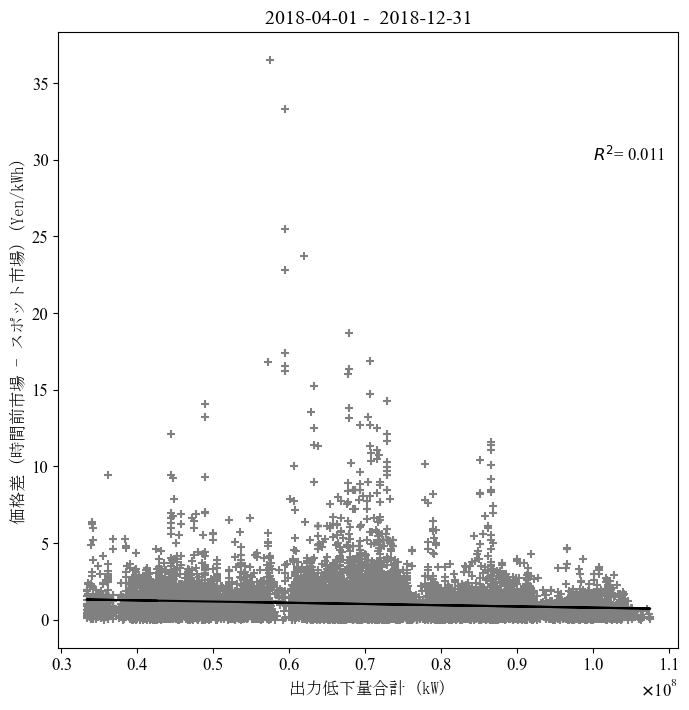

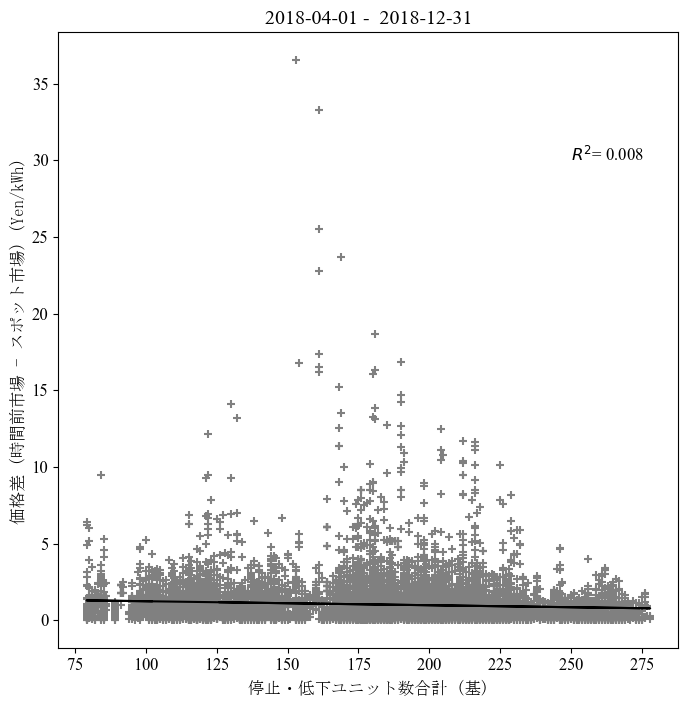

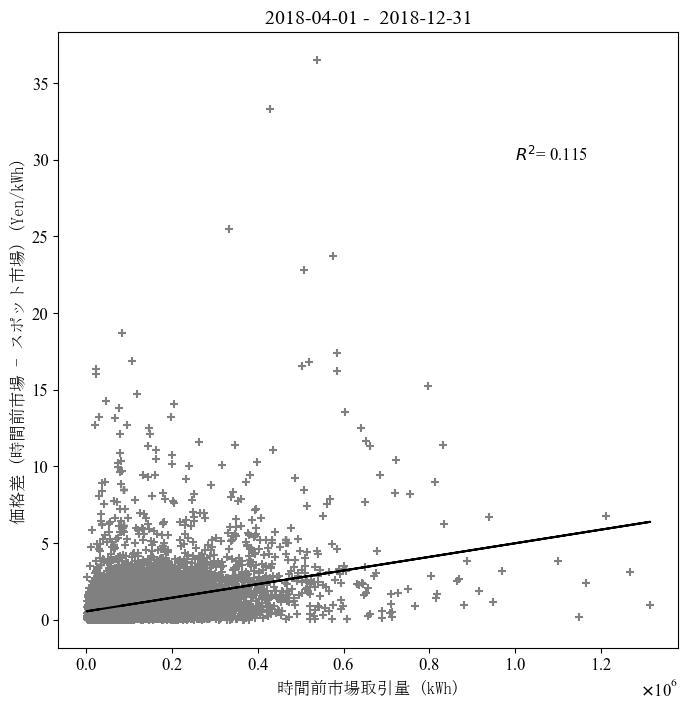

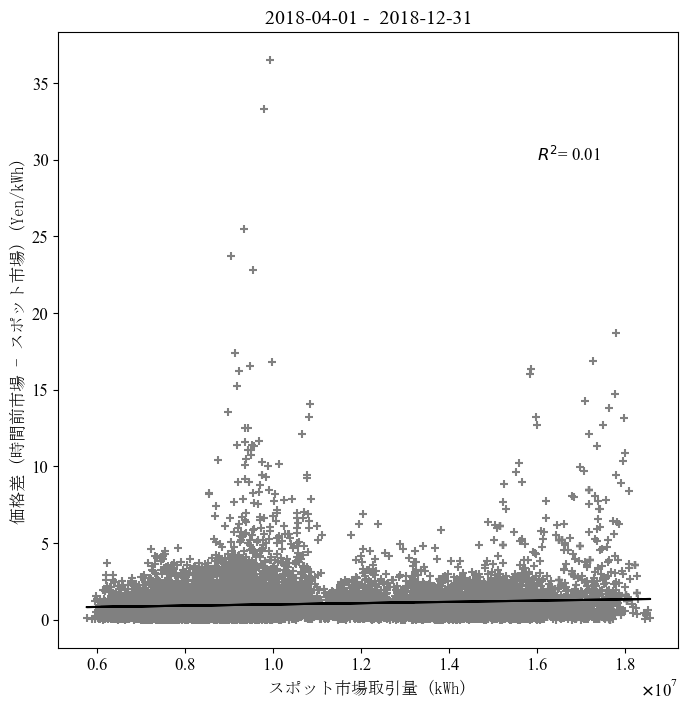

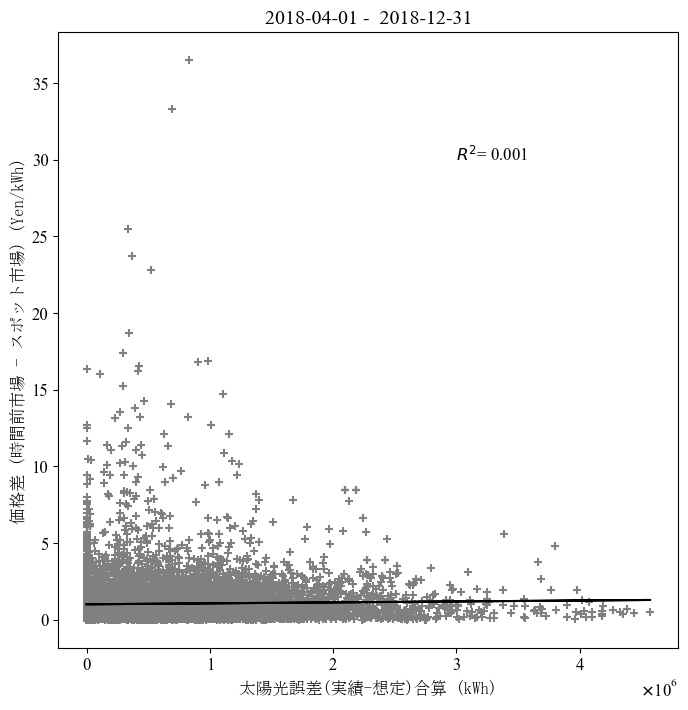

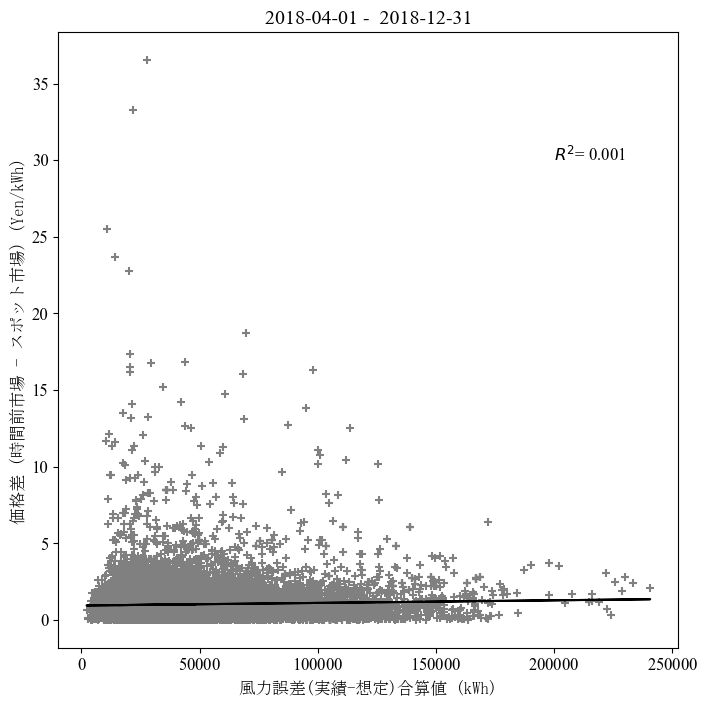

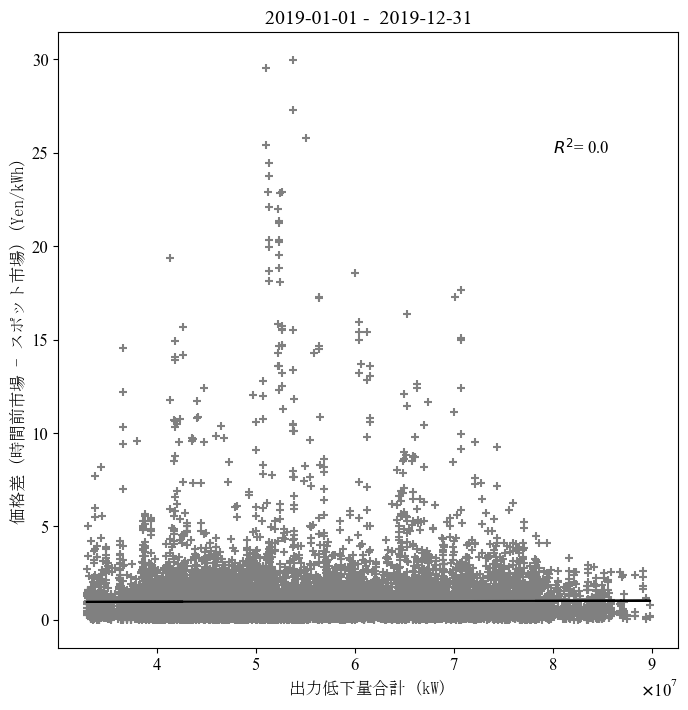

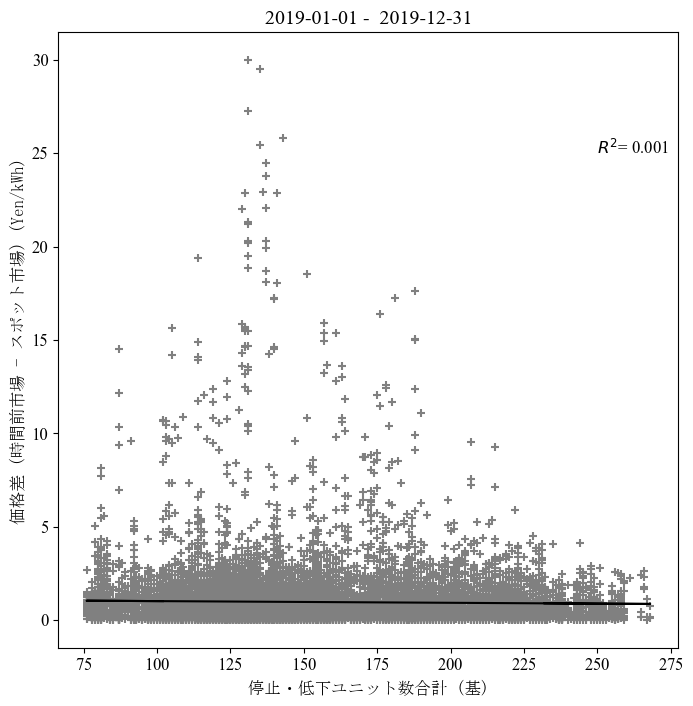

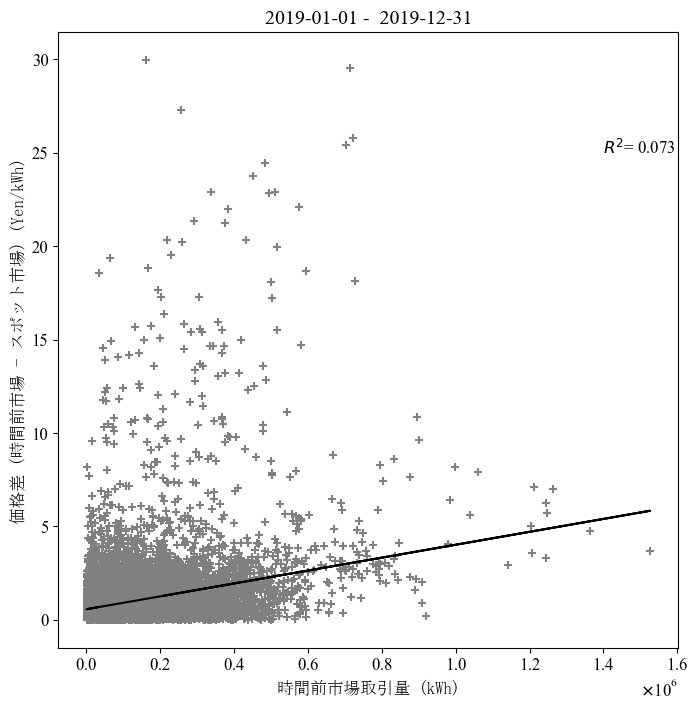

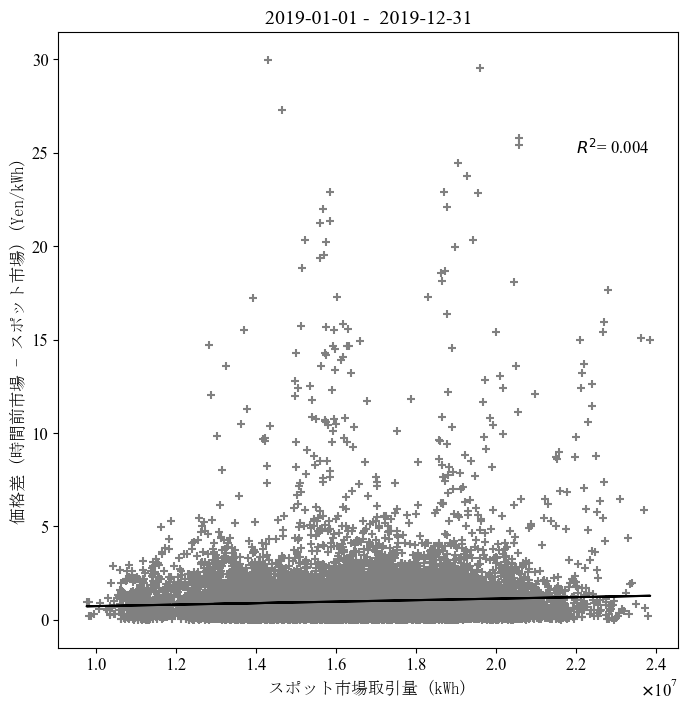

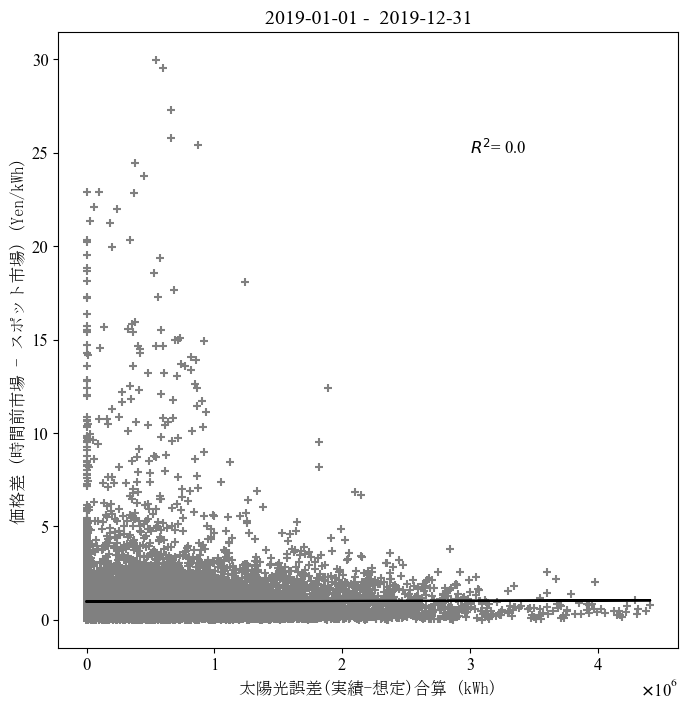

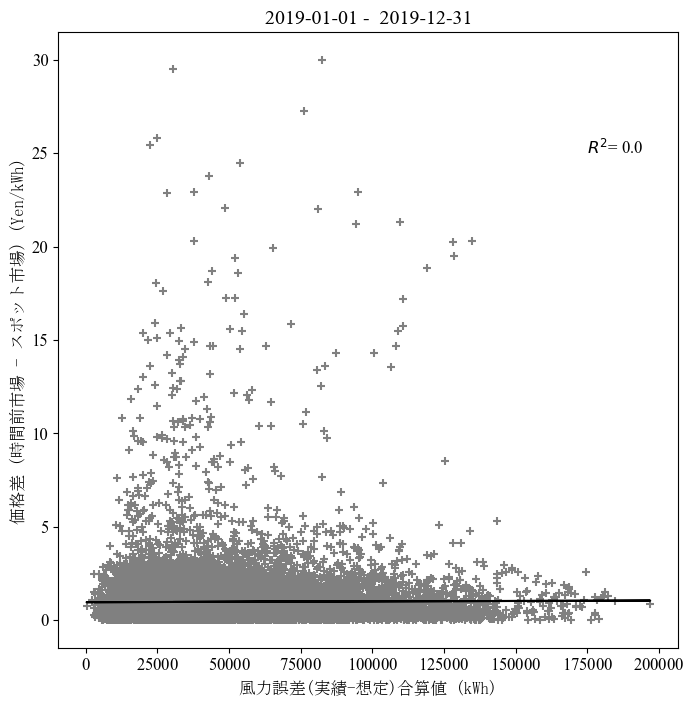

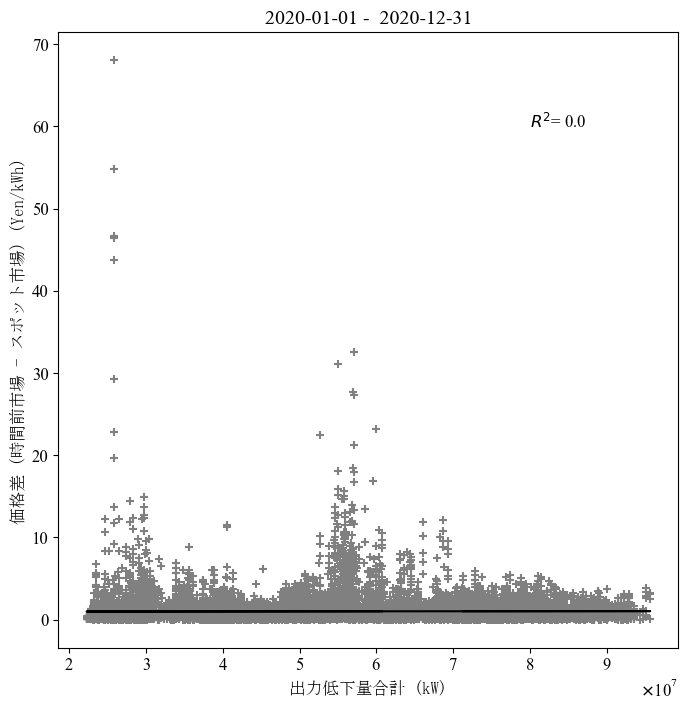

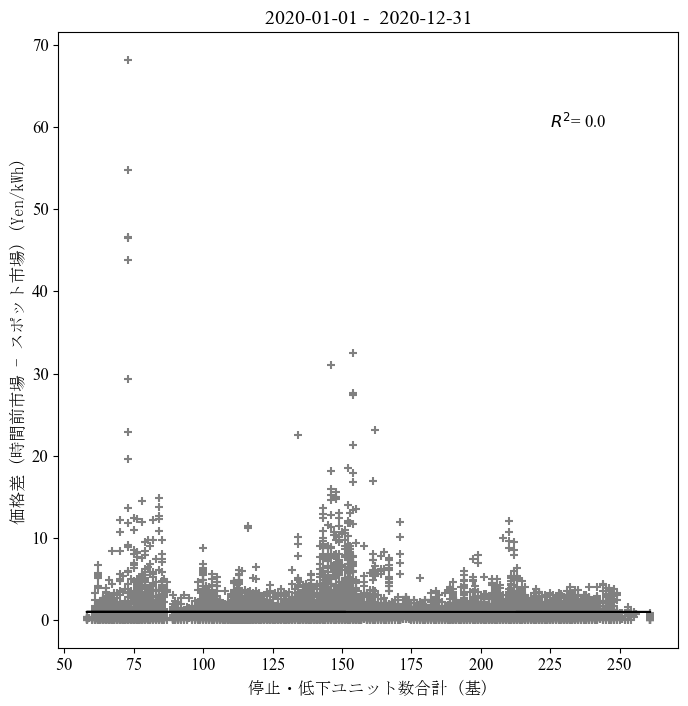

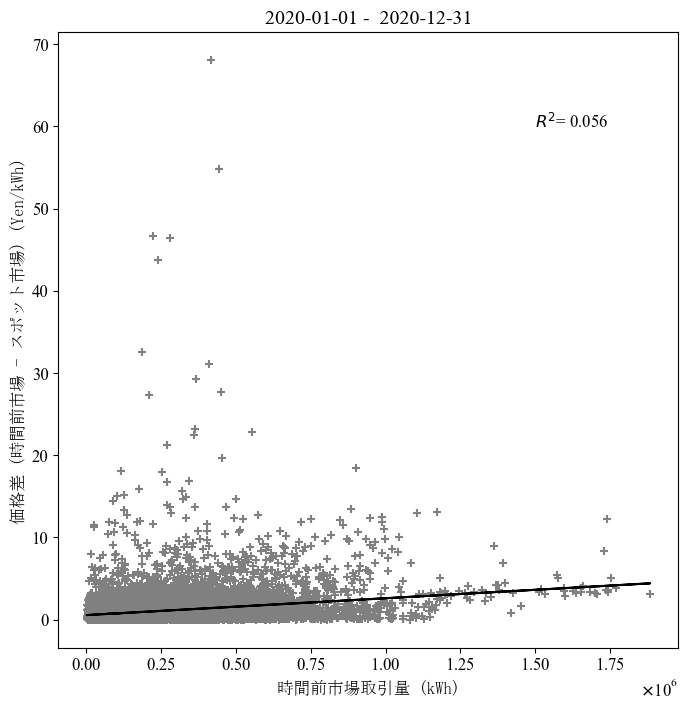

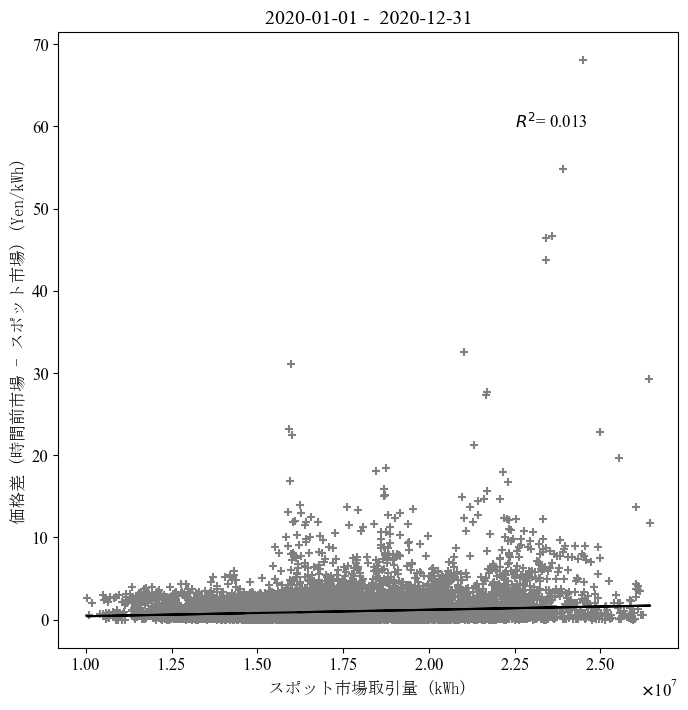

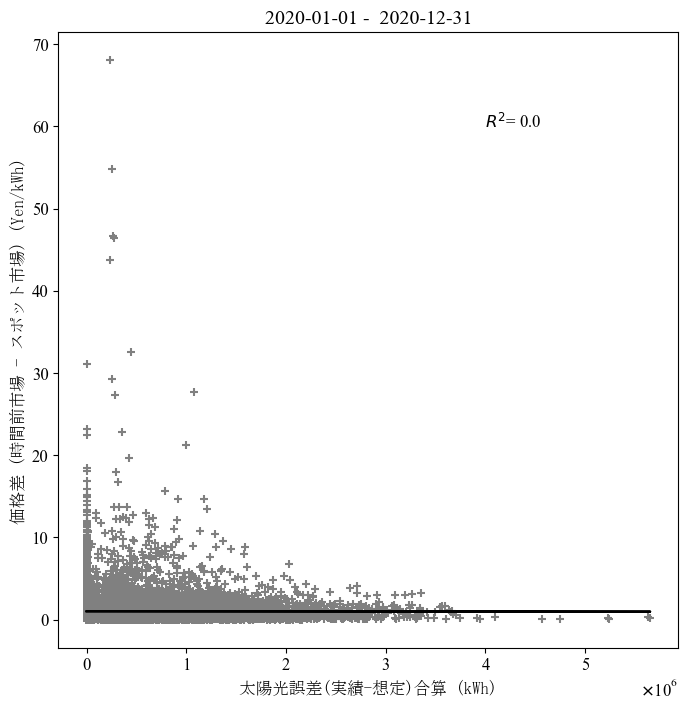

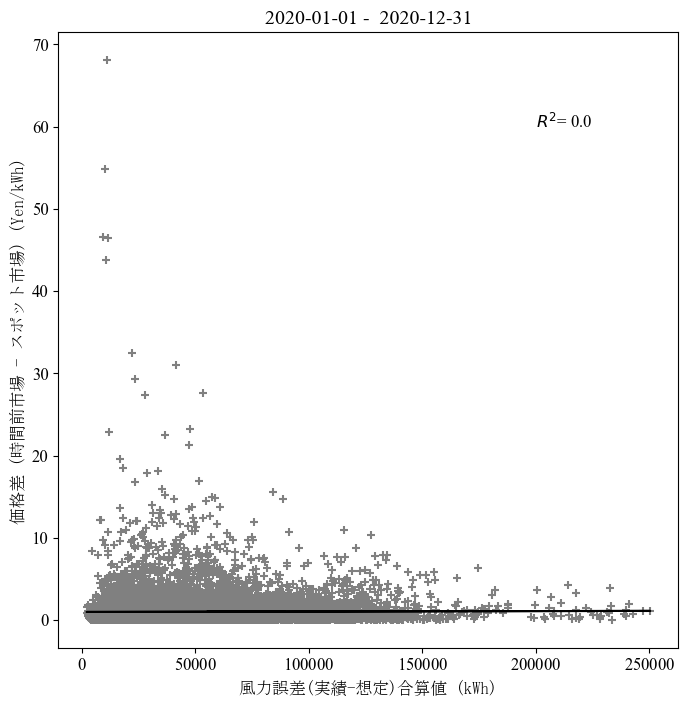

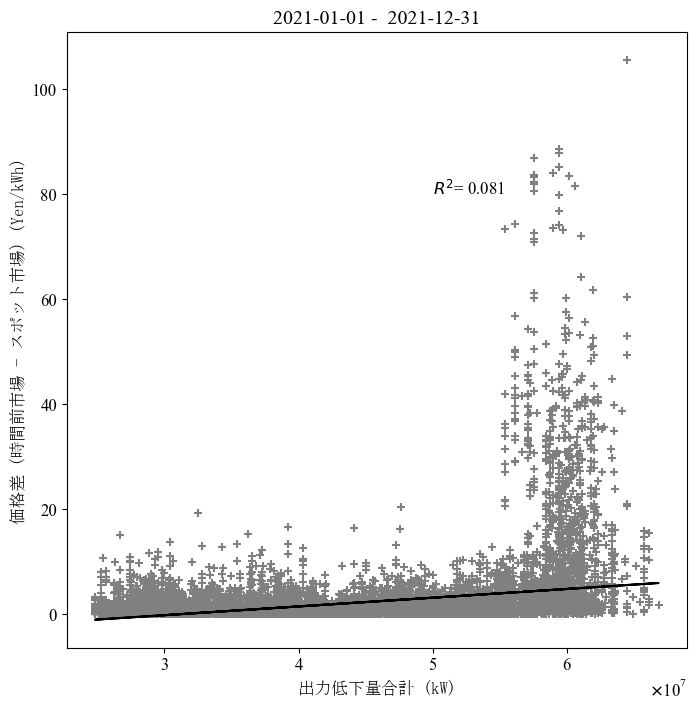

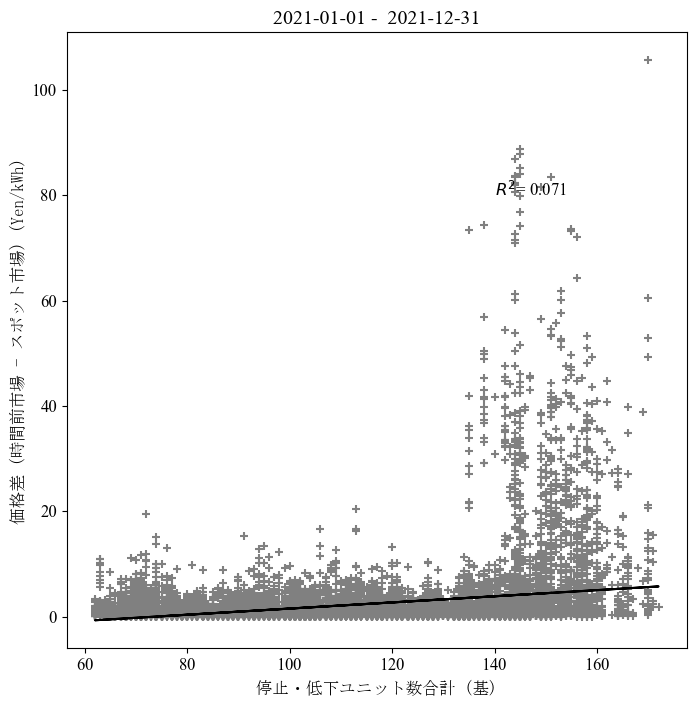

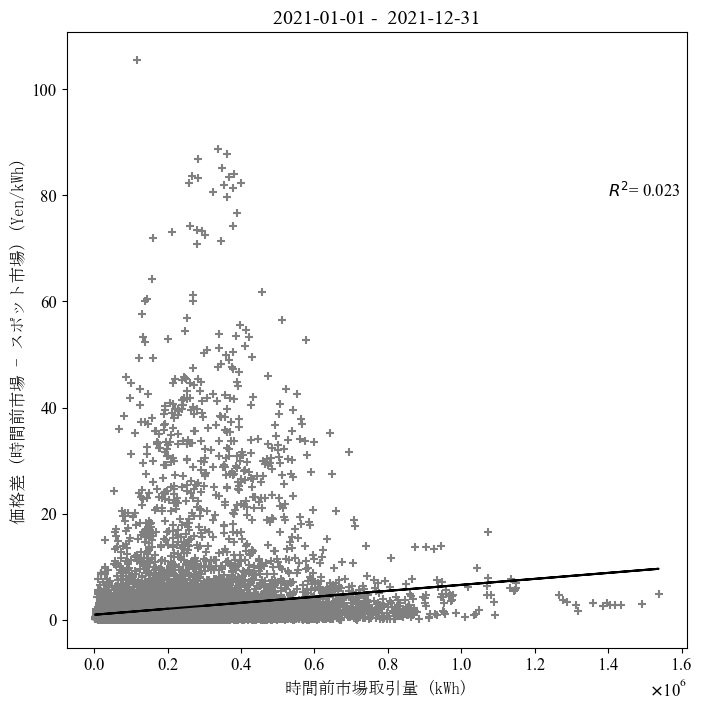

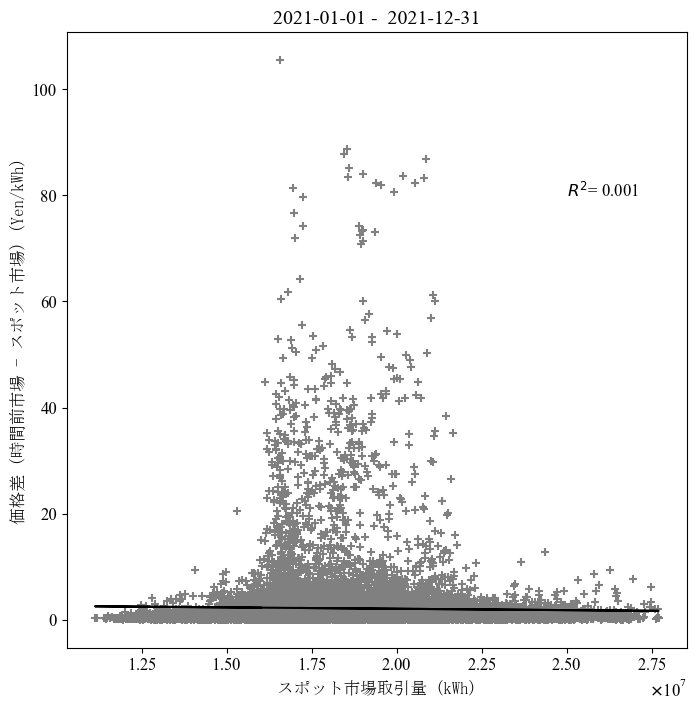

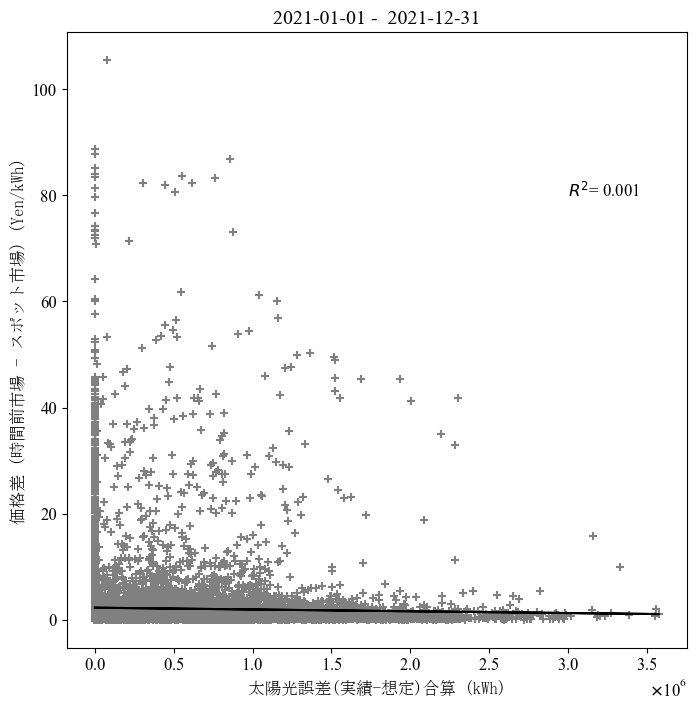

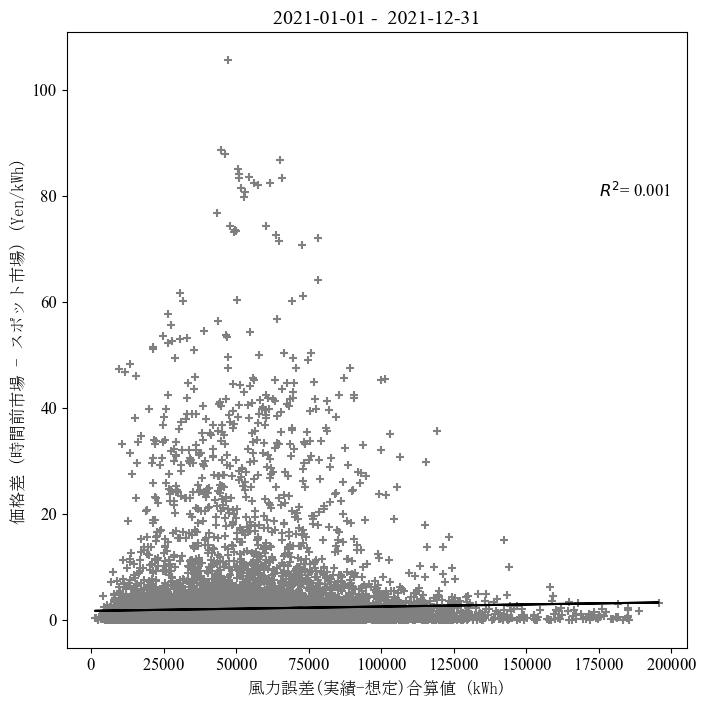

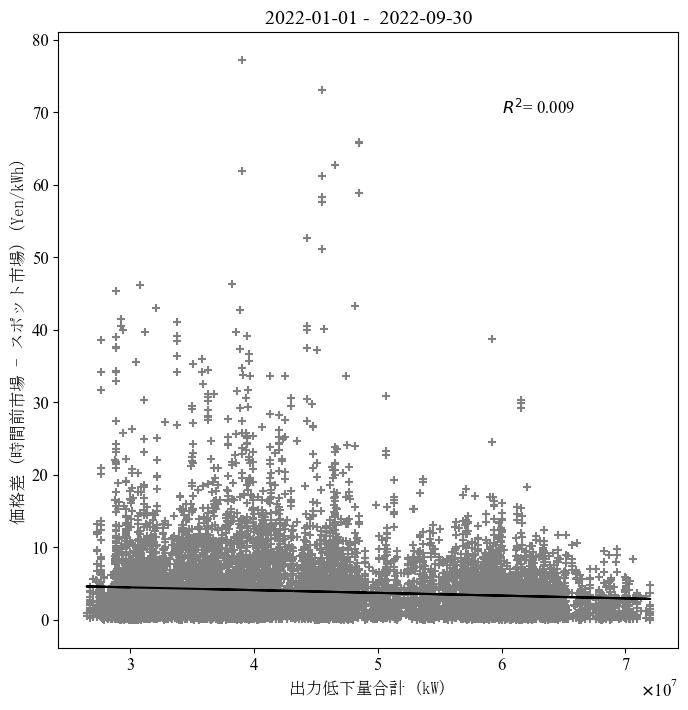

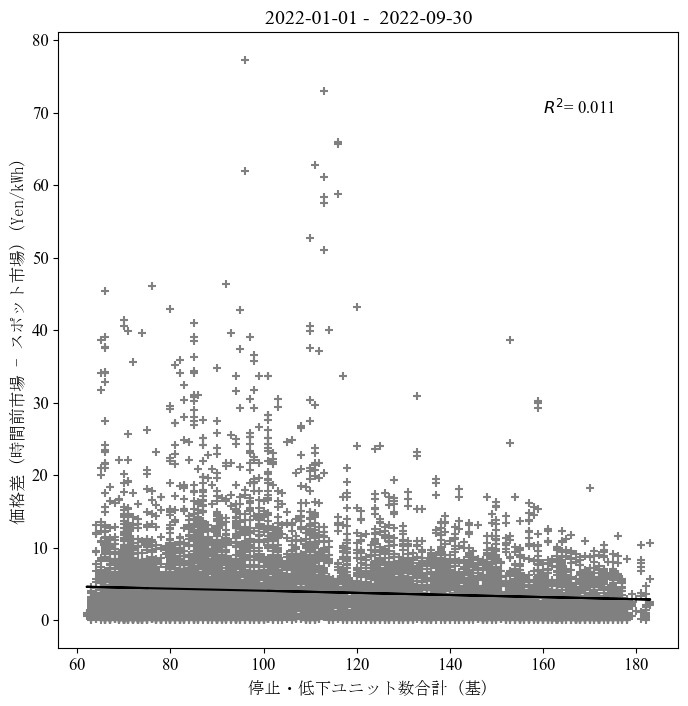

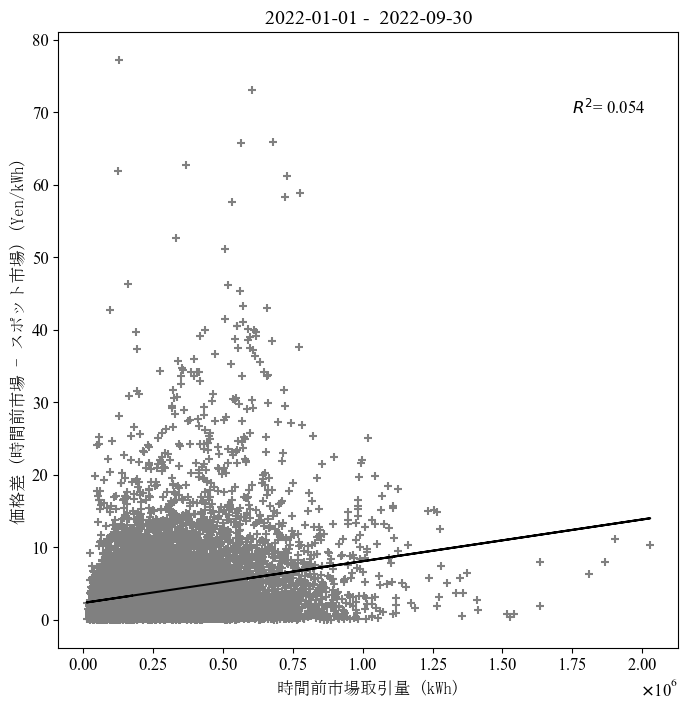

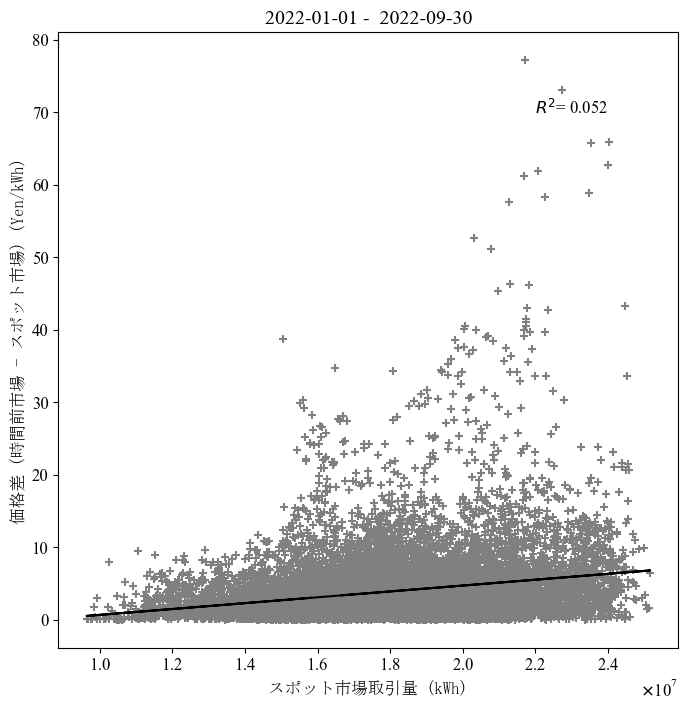

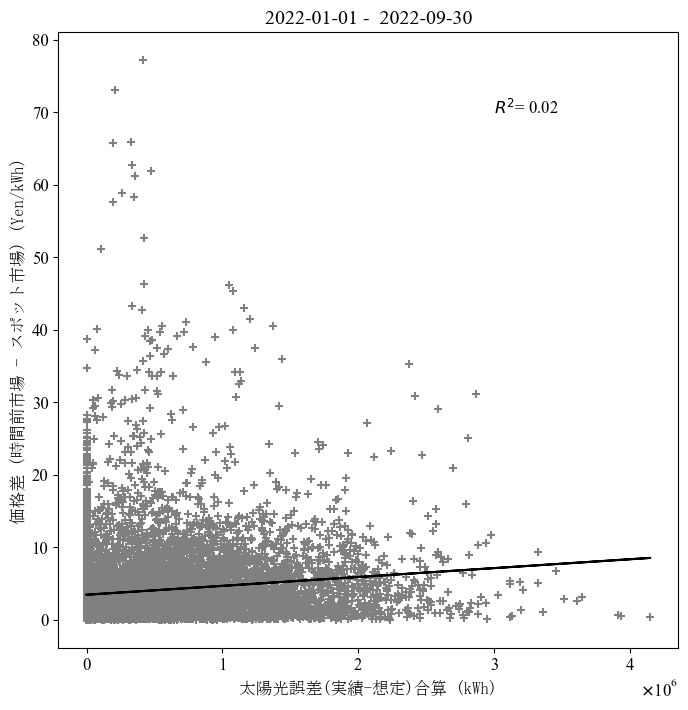

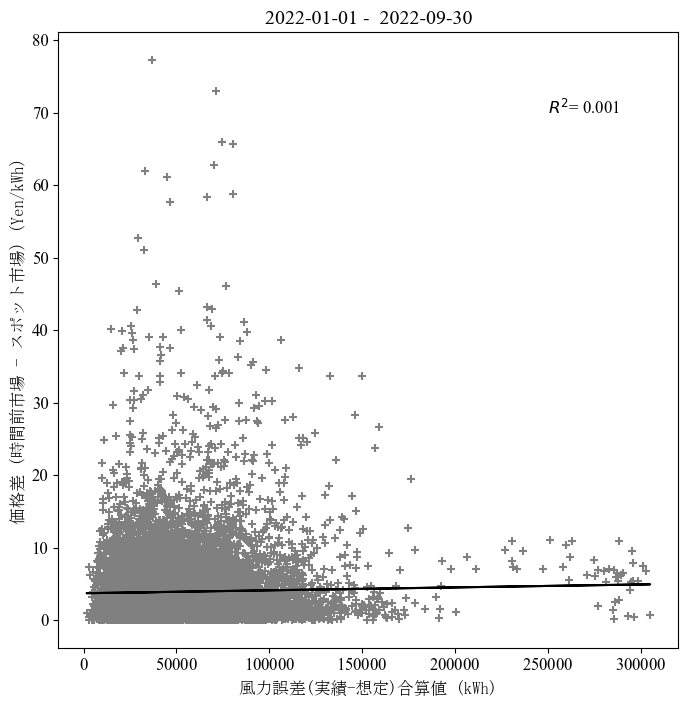

In [3]:
# 絶対値と相関
def ABS_Year_Plot_Soukan(x_values,y_values,times,x_element,y_element,year):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] =12
    fig = plt.figure(figsize=(8,8))
    ax1 = fig.subplots()
    ax1.scatter(x_values,y_values,color = 'gray',marker='+')
    # ax1.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))

    xtick = ax1.get_xticks()
    ytick =ax1.get_yticks()
    ax1.set_xticks(xtick)
    ax1.set_xticklabels(xtick)
    ax1.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    # ax1.xaxis.set_major_formatter(fontsize =12)
    ax1.set_xlabel(x_element,fontname = 'MS Mincho')
    ax1.set_ylabel(y_element,fontname = 'MS Mincho')

    title = f'{times[0]} -  {times[-1]}'
    plt.title(title)

    k =np.polyfit(x_values,y_values,1)
    x_fit = x_values
    y_fit = k[0]*x_fit+k[1]
    ax1.plot(x_fit,y_fit,color ='black')

    R2 = round(np.corrcoef(x_values,y_values)[0][1]**2,3)
    plt.text(ax1.get_xticks()[-3],ax1.get_yticks()[-3],f'$R^2$= {R2}')
    plt.savefig(f'../../../卒論関連書類/画像/3章画像/分析結果画像/要因相関PLOT/各年ABS/{year}_{x_element}.png')

    plt.show()

# 年毎の描画
cols = ['DateTime', 'gap_price[intra-spot](円/kWh)','低下量合計', '停止・低下ユニット数合計','intra_volume（MWh/h）','spot_volume(kWh)', '太陽光絶対値誤差合算(実績-想定)(kWh)',
       '風力絶対値誤差合算(実績-想定)(kWh)']

df_select = df_king[cols].dropna()
re_col = ['DateTime', '価格差 (時間前市場 - スポット市場) (Yen/kWh)','出力低下量合計 (kW)', '停止・低下ユニット数合計 (基)','時間前市場取引量 (kWh)','スポット市場取引量 (kWh)', '太陽光誤差(実績-想定)合算 (kWh)',
       '風力誤差(実績-想定)合算値 (kWh)'
    #    , 'エリア毎の広域予備率の平均値(%)'
       ]
df_select.columns = re_col
df_select['時間前市場取引量 (kWh)'] =df_select['時間前市場取引量 (kWh)']*1000/2



for year in range(2018,2023):
# year=2018
    start_point = dt.datetime(year,1,1,0,0)
    end_point = dt.datetime(year,12,31,23,30)
    df = df_select[(df_select['DateTime']>=start_point)&(df_select['DateTime']<=end_point)]

    # まず、データがある分すべての相関をとる。
    target =re_col[2:]
    for i in range(len(target)):
        # i= 0
        x_element = target[i]
        y_element ='価格差 (時間前市場 - スポット市場) (Yen/kWh)'
        x_values = df[x_element].values
        y_values = abs(df[y_element].values)

        times = df['DateTime'].dt.date.values
        ABS_Year_Plot_Soukan(x_values,y_values,times,x_element,y_element,year)

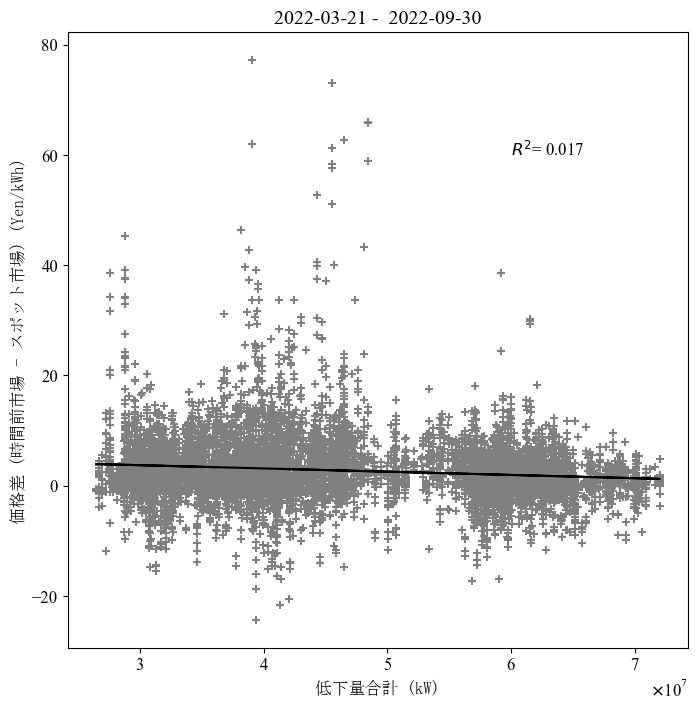

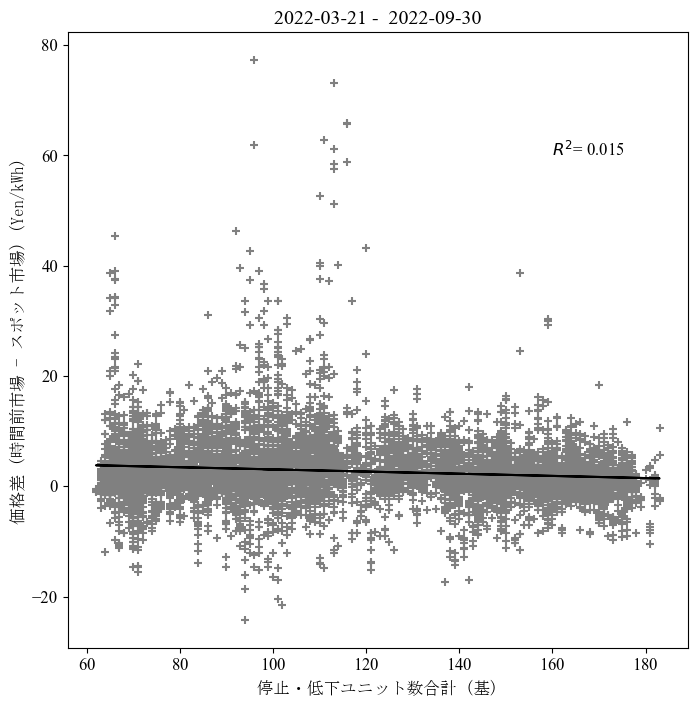

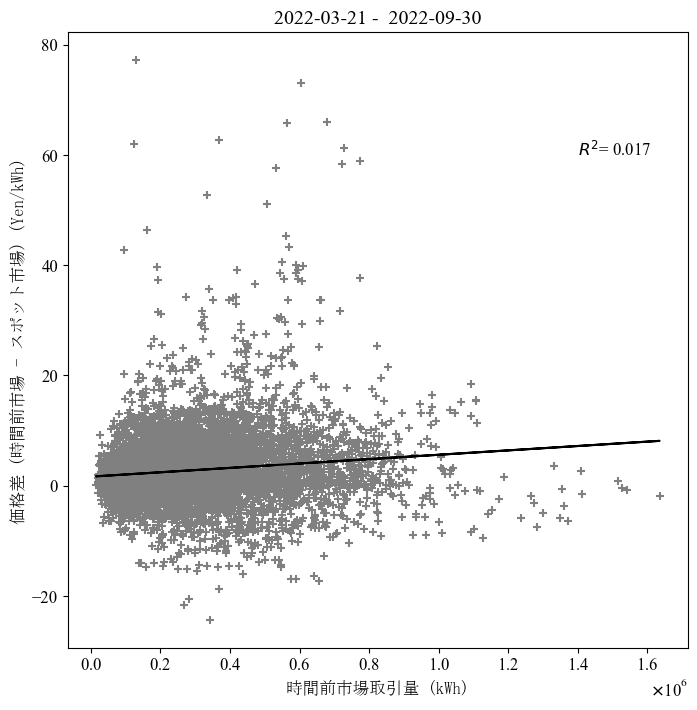

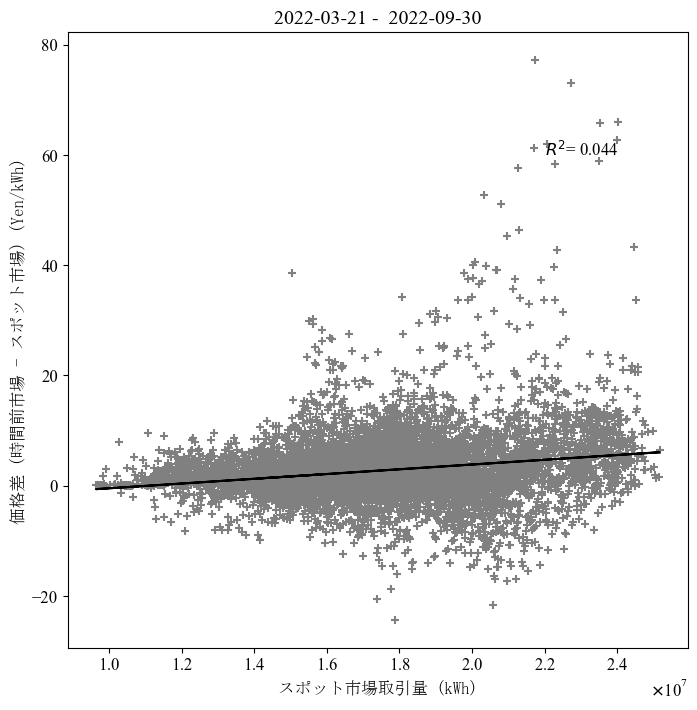

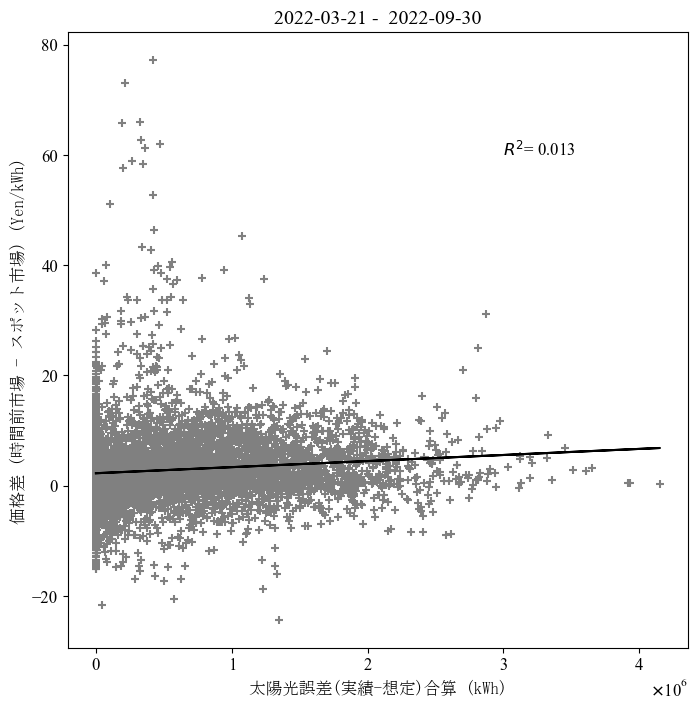

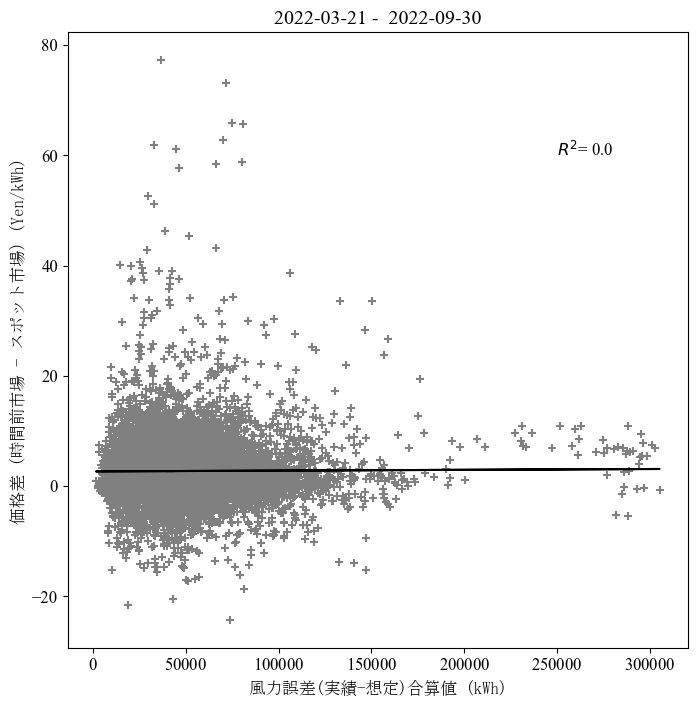

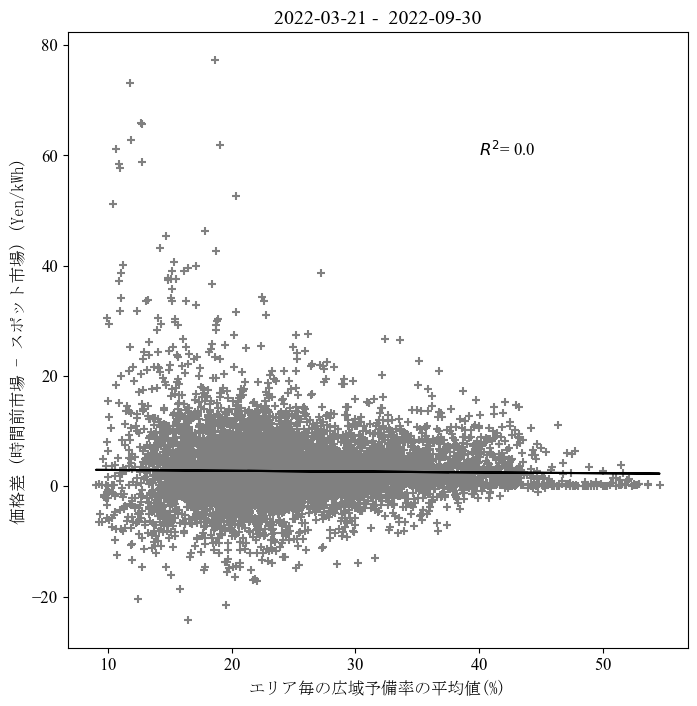

In [125]:
# まず、データがある分すべての相関をとる。

target =re_col[2:]
for i in range(len(target)):
    # i= 0
    x_element = target[i]
    y_element ='価格差 (時間前市場 - スポット市場) (Yen/kWh)'
    x_values = df[x_element].values
    y_values = df[y_element].values

    times = df['DateTime'].dt.date.values
    Plot_Soukan(x_values,y_values,times,x_element,y_element)


In [130]:
year=2018
start_point = dt.datetime(year,1,1,0,0)
end_point = dt.datetime(year,12,31,23,30)

In [133]:
x_element

'出力低下量合計 (kW)'

In [134]:
df

,DateTime,価格差 (時間前市場 - スポット市場) (Yen/kWh),出力低下量合計 (kW),停止・低下ユニット数合計 (基),時間前市場取引量 (kWh),スポット市場取引量 (kWh),太陽光誤差(実績-想定)合算 (kWh),風力誤差(実績-想定)合算値 (kWh),エリア毎の広域予備率の平均値(%)


In [135]:
start_point = dt.datetime(year,1,1,0,0)
end_point = dt.datetime(year,12,31,23,30)
df = df_select[(df_select['DateTime']>=start_point)&(df_select['DateTime']<=end_point)]


In [138]:
(df_select['DateTime']>=start_point)&(df_select['DateTime']<=end_point)

70447    False
70448    False
70449    False
70450    False
70451    False
         ...  
79754    False
79755    False
79756    False
79757    False
79758    False
Name: DateTime, Length: 9312, dtype: bool

In [121]:



Plot_Soukan(x_values,y_values,times)

TypeError: Plot_Soukan() missing 2 required positional arguments: 'x_element' and 'y_element'

Text(60000000.0, 60.0, '$R^2$= 0.017')

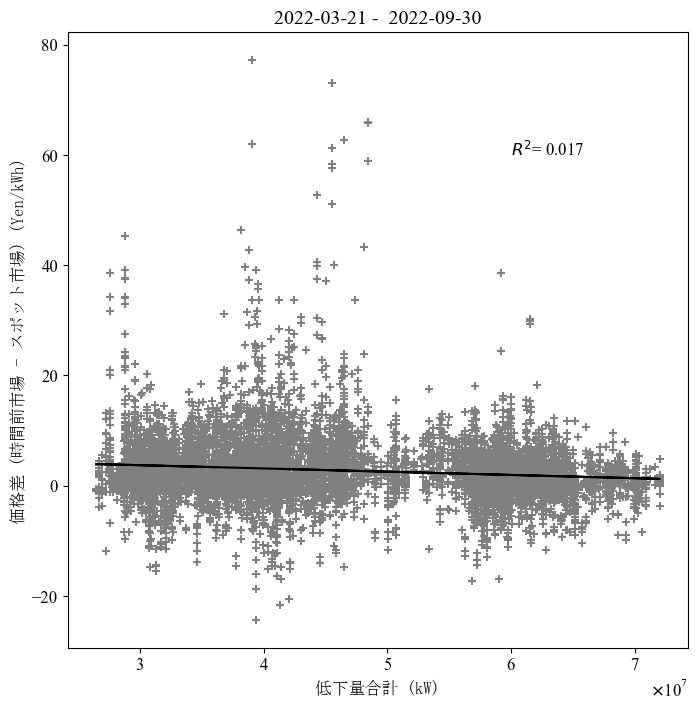

In [110]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] =12
fig = plt.figure(figsize=(8,8))
ax1 = fig.subplots()
ax1.scatter(x_values,y_values,color = 'gray',marker='+')
# ax1.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))

xtick = ax1.get_xticks()
ytick =ax1.get_yticks()
ax1.set_xticks(xtick)
ax1.set_xticklabels(xtick)
ax1.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# ax1.xaxis.set_major_formatter(fontsize =12)
ax1.set_xlabel(x_element,fontname = 'MS Mincho')
ax1.set_ylabel(y_element,fontname = 'MS Mincho')

title = f'{times[0]} -  {times[-1]}'
plt.title(title)

k =np.polyfit(x_values,y_values,1)
x_fit = x_values
y_fit = k[0]*x_fit+k[1]
ax1.plot(x_fit,y_fit,color ='black')

R2 = round(np.corrcoef(x_values,y_values)[0][1]**2,3)
plt.text(ax1.get_xticks()[-3],ax1.get_yticks()[-3],f'$R^2$= {R2}')

plt.show()




In [92]:
times[0]

datetime.date(2022, 3, 21)

In [69]:
f(times)

NameError: name 'f' is not defined

In [84]:
R2 = round(np.corrcoef(x_values,y_values)[0][1]**2,3)

In [85]:
R2

0.017

In [88]:
k =np.polyfit(x_values,y_values,1)
x_fit = x_values*10
y_fit = k[0]*x_fit+k[1]



In [104]:
k[0]

-5.895035365835019e-08

In [ ]:
xlabel = '低下量'

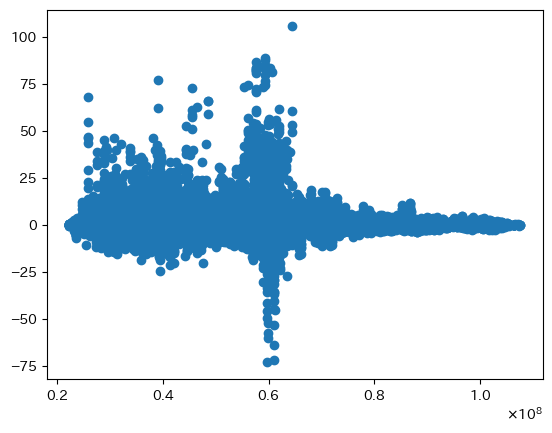

In [16]:
# 2軸描画関数

fig = plt.figure()
ax1 = fig.subplots()
ax1.scatter(x_values,y_values)
ax1.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))



In [7]:
cols

['DateTime', 'gap_price[intra-spot](円/kWh)', '低下量合計']

In [11]:
df_select = df_king[cols].dropna()

In [12]:
df_select

,DateTime,gap_price[intra-spot](円/kWh),低下量合計
0,2018-04-01 00:00:00,0.32,53484820.0
1,2018-04-01 00:30:00,0.59,102677262.0
2,2018-04-01 01:00:00,0.72,100007262.0
3,2018-04-01 01:30:00,0.72,100007262.0
4,2018-04-01 02:00:00,-0.03,100007262.0
...,...,...,...
84368,2023-01-05 00:30:00,-1.78,54516670.0
84369,2023-01-05 01:00:00,-2.33,54516670.0
84370,2023-01-05 01:30:00,-2.45,54516670.0
84371,2023-01-05 02:00:00,-3.07,54266670.0
